In [2]:
print("hello")

hello


In [3]:
import pandas as pd
import numpy as np
import html
import matplotlib.pyplot as plt
import matplotlib as mpl

In [4]:
# 1) Load (auto-detects comma vs tab). Change the path to your file.
path = "/Users/alexisjacques/Downloads/CCRB-Complaint-Data_202007271729/allegations_202007271729.csv"
df = pd.read_csv(path, engine="python", sep=None)

In [5]:
# Dataset Overview
print("Dataset Shape:", df.shape)
print("\nColumn Names and Types:")
print(df.dtypes)
print("\nBasic Info:")
df.info()

Dataset Shape: (33358, 27)

Column Names and Types:
unique_mos_id                 int64
first_name                   object
last_name                    object
command_now                  object
shield_no                     int64
complaint_id                  int64
month_received                int64
year_received                 int64
month_closed                  int64
year_closed                   int64
command_at_incident          object
rank_abbrev_incident         object
rank_abbrev_now              object
rank_now                     object
rank_incident                object
mos_ethnicity                object
mos_gender                   object
mos_age_incident              int64
complainant_ethnicity        object
complainant_gender           object
complainant_age_incident    float64
fado_type                    object
allegation                   object
precinct                    float64
contact_reason               object
outcome_description          object
board_dispos

In [6]:
list_of_column_names = list(df.columns)
print(list_of_column_names)

['unique_mos_id', 'first_name', 'last_name', 'command_now', 'shield_no', 'complaint_id', 'month_received', 'year_received', 'month_closed', 'year_closed', 'command_at_incident', 'rank_abbrev_incident', 'rank_abbrev_now', 'rank_now', 'rank_incident', 'mos_ethnicity', 'mos_gender', 'mos_age_incident', 'complainant_ethnicity', 'complainant_gender', 'complainant_age_incident', 'fado_type', 'allegation', 'precinct', 'contact_reason', 'outcome_description', 'board_disposition']


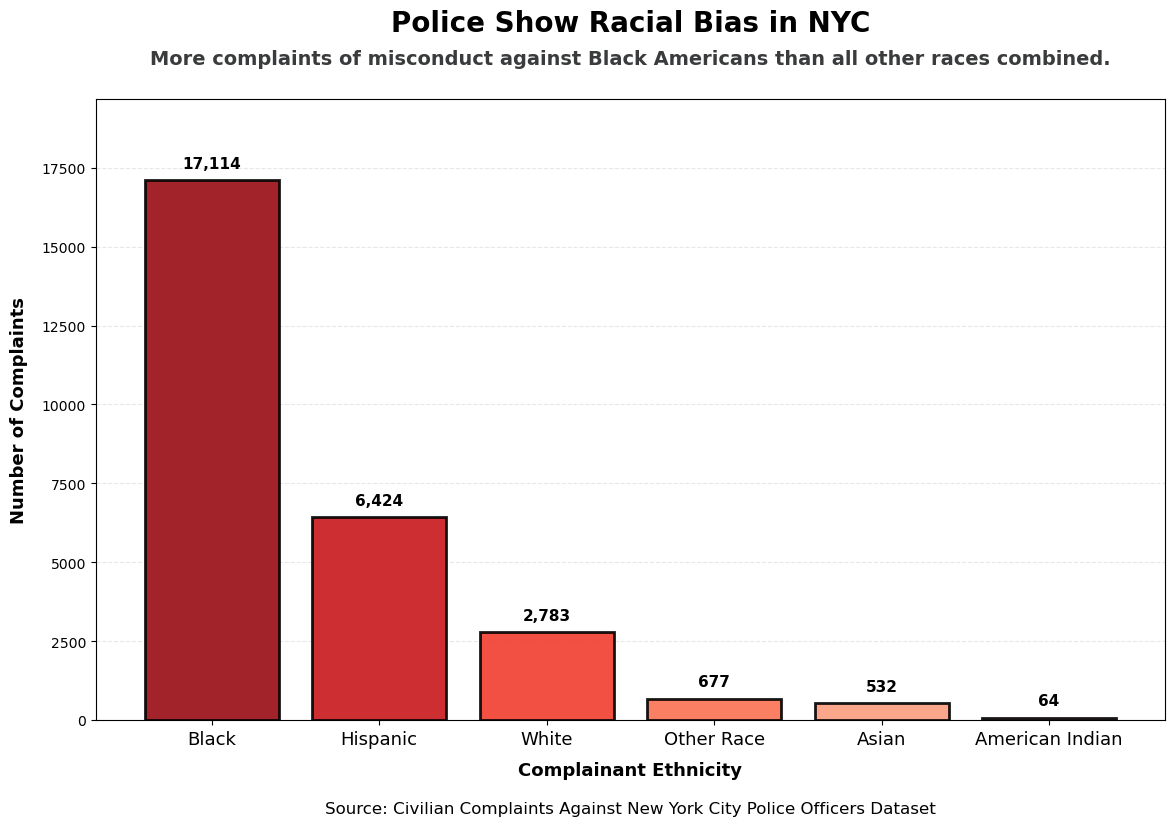

NYPD Misconduct is Racialized
Black                 17,114 ( 62.0%) ██████████████████████████████████████████████████████████████
Hispanic               6,424 ( 23.3%) ███████████████████████
White                  2,783 ( 10.1%) ██████████
Other Race               677 (  2.5%) ██
Asian                    532 (  1.9%) █
American Indian           64 (  0.2%) 
TOTAL                 27,594 (100.0%)


In [7]:
# Vertical Bar Chart: NYPD Complaints by Complainant Ethnicity
# With data labels, percentages, color gradient, and specific ordering

# Get complaint counts by ethnicity
ethnicity_counts = df['complainant_ethnicity'].value_counts()

# Filter for specified races only
specified_races = ['Black', 'Hispanic', 'White', 'Other Race', 'Asian', 'American Indian']
filtered_counts = ethnicity_counts[ethnicity_counts.index.isin(specified_races)]

# Sort in descending order
filtered_counts = filtered_counts.sort_values(ascending=False)

# Calculate percentages
total_complaints = filtered_counts.sum()
percentages = (filtered_counts / total_complaints) * 100

# Create figure
fig, ax = plt.subplots(figsize=(12, 8))

# Create color gradient (from dark to light based on values)
colors = plt.cm.Reds(np.linspace(0.2, 0.9, len(filtered_counts)))
colors = colors[::-1]


# Create bars
bars = ax.bar(range(len(filtered_counts)), filtered_counts.values, 
              color=colors, edgecolor='black', linewidth=2, alpha=0.9)

# Customize axes
ax.set_xticks(range(len(filtered_counts)))
ax.set_xticklabels(filtered_counts.index, fontsize=13, fontweight='normal')
ax.set_xlabel('Complainant Ethnicity', fontsize=13, fontweight='bold', labelpad=10)
ax.set_ylabel('Number of Complaints', fontsize=13, fontweight='bold', labelpad=10)


# Create title with different font sizes for each line
ax.text(0.5, 1.10, 'Police Show Racial Bias in NYC', 
        ha='center', va='bottom', fontsize=20, fontweight='bold',
        transform=ax.transAxes)
ax.text(0.5, 1.05, 'More complaints of misconduct against Black Americans than all other races combined.', 
        ha='center', va='bottom', fontsize=14, fontweight='bold', color = '#3A3B3C',
        transform=ax.transAxes)


# Add grid for readability
ax.grid(axis='y', alpha=0.3, linestyle='--', linewidth=0.8)
ax.set_axisbelow(True)

# Add data labels (count and percentage) on top of each bar
for i, (count, pct) in enumerate(zip(filtered_counts.values, percentages.values)):
    # Total count
    ax.text(i, count + 300, f'{count:,}', 
           ha='center', va='bottom', fontsize=11, fontweight='bold', color='black')


# Adjust y-axis to accommodate labels
ax.set_ylim(0, max(filtered_counts.values) * 1.15)


plt.tight_layout()

ax.text(0.5, -0.15, 'Source: Civilian Complaints Against New York City Police Officers Dataset', 
        ha='center', fontsize=12, style='normal',
        transform=ax.transAxes)

plt.show()

# Print summary statistics
print("NYPD Misconduct is Racialized")
print("=" * 60)
for ethnicity, count in filtered_counts.items():
    pct = (count / total_complaints) * 100
    bar = '█' * int(pct)
    print(f"{ethnicity:20s} {count:7,} ({pct:5.1f}%) {bar}")
print("=" * 60)
print(f"{'TOTAL':20s} {total_complaints:7,} (100.0%)")

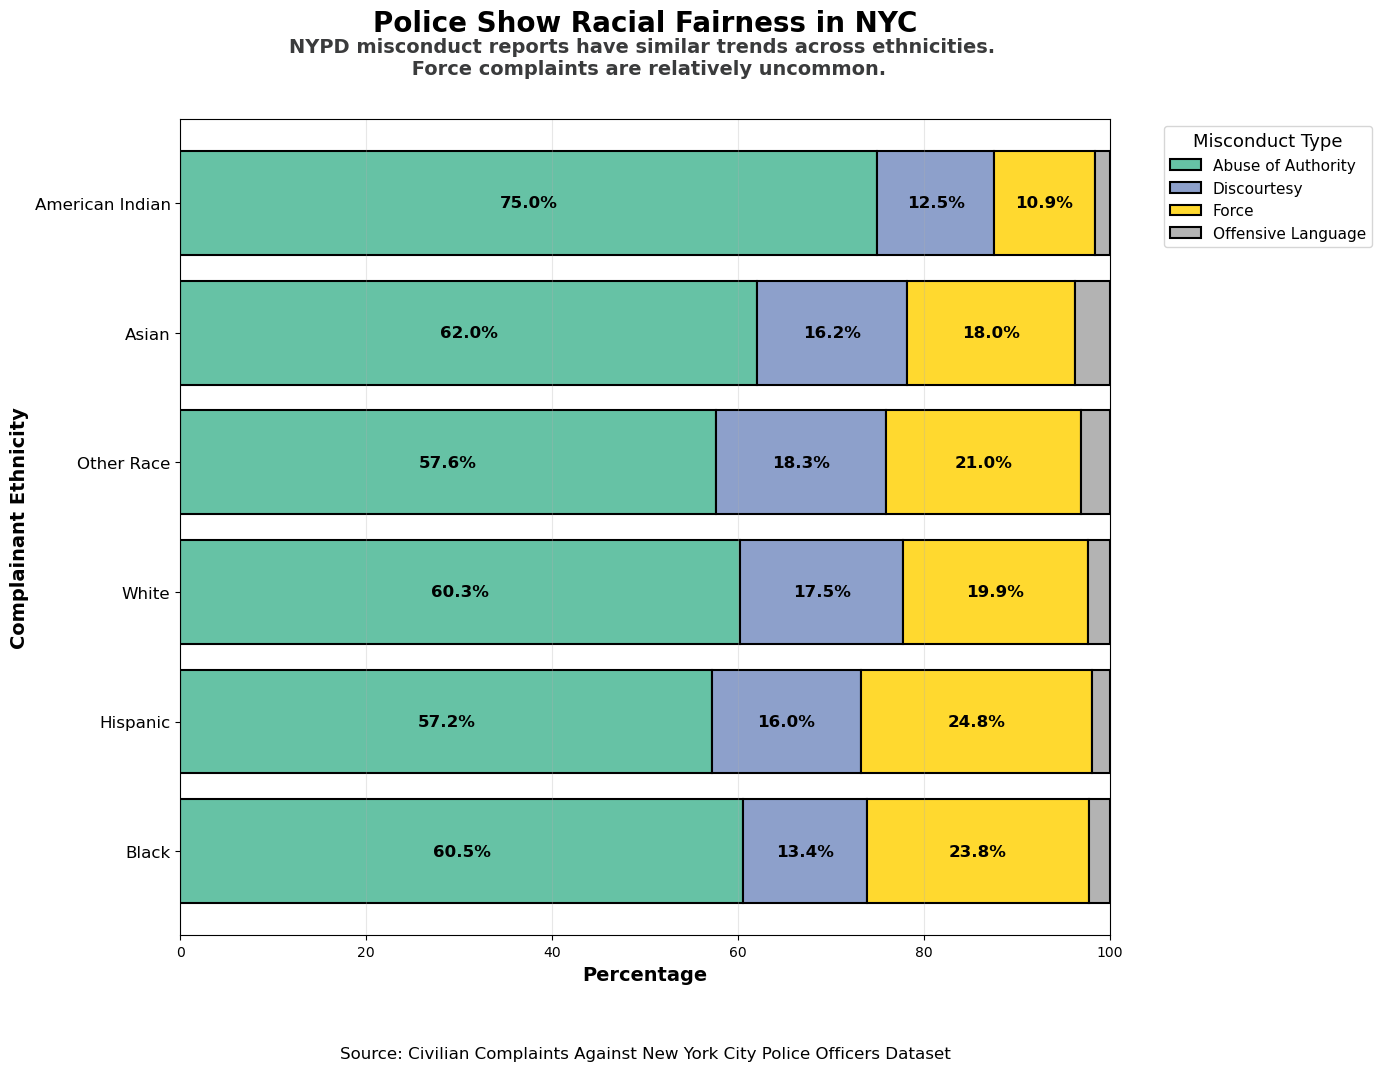

Complaint type breakdown by ethnicity (percentages):
fado_type              Abuse of Authority  Discourtesy  Force  \
complainant_ethnicity                                           
Black                                60.5         13.4   23.8   
Hispanic                             57.2         16.0   24.8   
White                                60.3         17.5   19.9   
Other Race                           57.6         18.3   21.0   
Asian                                62.0         16.2   18.0   
American Indian                      75.0         12.5   10.9   

fado_type              Offensive Language  
complainant_ethnicity                      
Black                                 2.3  
Hispanic                              2.0  
White                                 2.4  
Other Race                            3.1  
Asian                                 3.8  
American Indian                       1.6  


In [82]:
# Method 1: 100% Stacked Bar Chart (Horizontal)
# Shows proportions clearly for each ethnicity

ethnicity_fado = pd.crosstab(df['complainant_ethnicity'], df['fado_type'])
specified_categories = ['Black', 'Hispanic', 'White', 'Other Race', 'Asian', 'American Indian']
ethnicity_fado_filtered = ethnicity_fado.loc[[cat for cat in specified_categories if cat in ethnicity_fado.index]]

# Calculate percentages
ethnicity_fado_pct = ethnicity_fado_filtered.div(ethnicity_fado_filtered.sum(axis=1), axis=0) * 100

fig, ax = plt.subplots(figsize=(14, 10))

# Create 100% stacked horizontal bar chart
ethnicity_fado_pct.plot(kind='barh', stacked=True, ax=ax, width=0.8,
                        colormap='Set2', edgecolor='black', linewidth=1.5)

ax.set_xlabel('Percentage', fontsize=14, fontweight='bold')
ax.set_ylabel('Complainant Ethnicity', fontsize=14, fontweight='bold')

plt.setp(ax.get_yticklabels(), fontsize=12, fontweight='normal')

# Create title with different font sizes for each line
ax.text(0.5, 1.10, 'Police Show Racial Fairness in NYC', 
        ha='center', va='bottom', fontsize=20, fontweight='bold', 
        transform=ax.transAxes)
ax.text(0.5, 1.05, 'NYPD misconduct reports have similar trends across ethnicities. \n Force complaints are relatively uncommon.', 
        ha='center', va='bottom', fontsize=14, fontweight='bold', color = '#3A3B3C', 
        transform=ax.transAxes)

ax.legend(title='Misconduct Type', fontsize=11, title_fontsize=13, bbox_to_anchor=(1.05, 1), loc='upper left')
ax.set_xlim(0, 100)
ax.grid(axis='x', alpha=0.3)

# Add percentage labels for each segment
for i, ethnicity in enumerate(ethnicity_fado_pct.index):
    cumsum = 0
    for fado_type in ethnicity_fado_pct.columns:
        pct = ethnicity_fado_pct.loc[ethnicity, fado_type]
        if pct > 5:  # Only label if segment is large enough
            ax.text(cumsum + pct/2, i, f'{pct:.1f}%', 
                   ha='center', va='center', fontsize=12, fontweight='bold', color='black')
        cumsum += pct

plt.tight_layout()

ax.text(0.5, -0.15, 'Source: Civilian Complaints Against New York City Police Officers Dataset', 
        ha='center', fontsize=12, style='normal',
        transform=ax.transAxes)

plt.show()

print("Complaint type breakdown by ethnicity (percentages):")
print(ethnicity_fado_pct.round(1))